In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import math
import json
from pathlib import Path
from tqdm import tqdm

import torch
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score
from eval_utils import *

In [3]:
train = pd.read_csv('flexddg_train.csv')
test = pd.read_csv('flexddg_test.csv')
all = pd.concat([train, test], ignore_index=True)
all.to_csv('flexddg_all.csv', index=False)

In [4]:
df_paths = ['ensemble_stab_foldx.csv', 'StaB-ddG.csv', 'appendix/april28_nolinear_rocklin.csv', 'StaB-ddG_zero-shot.csv', 'baselines/foldx_test.csv', 'baselines/rde_filtered.csv', 'baselines/vqmae_filtered.csv', 'baselines/promim.csv', 'baselines/promptddg.csv', 'baselines/diffaffinity.csv', 'baselines/flexddg_protddg.csv', 'baselines/ProteinMPNN_test_novarred.csv', 'baselines/ppiformer_finetuned_protddg.csv', 'baselines/esm_filtered.csv']
method_names = ['StaB-ddG + FoldX', 'StaB-ddG', 'Stability fine-tuned', 'StaB-ddG zero-shot', 'FoldX', 'RDE-Net', 'Surface-VQMAE', 'ProMIM', 'Prompt-DDG', 'DiffAffinity', 'Flex ddG', 'ProteinMPNN', 'PPIformer', 'ESM-IF1']

In [5]:
## test ensemble between stab and foldx
df1 = pd.read_csv('StaB-ddG.csv')
df2 = pd.read_csv('baselines/foldx_test.csv')
df2['ddG_pred'] = df1['ddG_pred'] * 0.5 + df2['ddG_pred'] * 0.5
df2.to_csv('ensemble_stab_foldx.csv', index=False)
compute_metrics(df2, bootstrap=False)

100%|██████████| 2/2 [00:00<00:00, 68.30it/s]


{'Spearman': 0.6100560426465513,
 'Spearman Standard Error': 0.03994640184916115,
 'Per Structure Spearman': 0.529293397970343,
 'Per Structure Spearman Standard Error': 0.03422634846663846,
 'Pearson': 0.5892365934458967,
 'Pearson Standard Error': 0.023495256509481588,
 'Per Structure Pearson': 0.562122521528791,
 'Per Structure Pearson Standard Error': 0.03596331623904653,
 'RMSE': 1.6223137166570893,
 'RMSE Standard Error': 0.0448715703432242,
 'Per Structure RMSE': 1.3209591862965684,
 'Per Structure RMSE Standard Error': 0.12188596718199729,
 'MAE': 1.1390700045516997,
 'Precision': 0.8780680918448139,
 'Recall': 0.9097621000820345,
 'ROC AUC': 0.7773066158374754,
 'ROC AUC Standard Error': 0.035275280518319074,
 'PR AUC': 0.928385193175715}

In [6]:
results = {}
for df_path, name in zip(df_paths, method_names):
    df = pd.read_csv(df_path)
    if '#Pdb' not in df.columns:
        try: 
            df['Name'] = df['complex']
            print(name)
        except KeyError:
            print('Error:', name)
        df['#Pdb'] = df['Name']

    results[name] = compute_metrics(df, bootstrap=True)

100%|██████████| 300/300 [00:05<00:00, 58.39it/s]


Surface-VQMAE


100%|██████████| 300/300 [00:06<00:00, 45.32it/s]


ProMIM


100%|██████████| 300/300 [00:05<00:00, 51.33it/s]


Prompt-DDG


100%|██████████| 300/300 [00:05<00:00, 55.26it/s]


DiffAffinity


100%|██████████| 300/300 [00:04<00:00, 60.35it/s]


In [7]:
import pickle
flex_test = pd.read_csv('baselines/flexddg_protddg.csv')
flex_train = pd.read_csv('baselines/flexddg_train.csv')
flex = pd.concat([flex_test, flex_train])
skempi_df = pd.read_csv('../SKEMPI/filtered_skempi.csv')
# with open('../SKEMPI/test_clusters.pkl', 'rb') as f:
#     test_clusters = pickle.load(f)
# test_df = test_df[test_df['super_clusters'].isin(test_clusters)]
# names = flex['#Pdb'].unique()
# v2 = []
# v1 = []
v1s = skempi_df[skempi_df['SKEMPI version'] == 1]['#Pdb'].unique()
flex_v1 = flex[flex['#Pdb'].isin(v1s)]
flex_v2 = flex[~flex['#Pdb'].isin(v1s)]
print(compute_metrics(flex_v1, bootstrap=False))
print('==============')
print(compute_metrics(flex_v2, bootstrap=False))


100%|██████████| 2/2 [00:00<00:00, 79.39it/s]


{'Spearman': 0.46893253447392147, 'Spearman Standard Error': 0.016356392729866, 'Per Structure Spearman': 0.4518821990555648, 'Per Structure Spearman Standard Error': 0.038900124806505815, 'Pearson': 0.26454866442959635, 'Pearson Standard Error': 0.05816499520189625, 'Per Structure Pearson': 0.47953347826489917, 'Per Structure Pearson Standard Error': 0.04125533131981945, 'RMSE': 3.547129858967424, 'RMSE Standard Error': 0.7535781986006214, 'Per Structure RMSE': 2.276741438486343, 'Per Structure RMSE Standard Error': 0.5206995431244866, 'MAE': 1.631180580756457, 'Precision': 0.848421052631579, 'Recall': 0.7996031746031746, 'ROC AUC': 0.6921119748378475, 'ROC AUC Standard Error': 0.011552097194022557, 'PR AUC': 0.9044632624496864}


100%|██████████| 2/2 [00:00<00:00, 55.64it/s]


{'Spearman': 0.5045322327819859, 'Spearman Standard Error': 0.0037984217622746563, 'Per Structure Spearman': 0.3515239527945587, 'Per Structure Spearman Standard Error': 0.03790842049369956, 'Pearson': 0.5076082612059586, 'Pearson Standard Error': 0.004314281531251962, 'Per Structure Pearson': 0.37039526802263567, 'Per Structure Pearson Standard Error': 0.038538666860678084, 'RMSE': 1.5501449098315285, 'RMSE Standard Error': 0.012417072174569554, 'Per Structure RMSE': 1.3345455439971698, 'Per Structure RMSE Standard Error': 0.0459500662035759, 'MAE': 1.1578185287686136, 'Precision': 0.8488453463960812, 'Recall': 0.8494397759103641, 'ROC AUC': 0.7396795081669032, 'ROC AUC Standard Error': 0.010599702560431412, 'PR AUC': 0.9032388002958016}


In [8]:
foldx = pd.read_csv('baselines/foldx_full.csv')
foldx_v1 = foldx[foldx['#Pdb'].isin(v1s)]
foldx_v2 = foldx[~foldx['#Pdb'].isin(v1s)]
print(compute_metrics(foldx_v1, bootstrap=False))
print('==============')
print(compute_metrics(foldx_v2, bootstrap=False))

100%|██████████| 2/2 [00:00<00:00, 81.85it/s]


{'Spearman': 0.5091288032727836, 'Spearman Standard Error': 0.007090768466152753, 'Per Structure Spearman': 0.4965510551139181, 'Per Structure Spearman Standard Error': 0.030532713481830488, 'Pearson': 0.46559795847505514, 'Pearson Standard Error': 0.0006743197458642936, 'Per Structure Pearson': 0.5288624625183287, 'Per Structure Pearson Standard Error': 0.02985653497083737, 'RMSE': 2.440977444572566, 'RMSE Standard Error': 0.06228408058623858, 'Per Structure RMSE': 1.9836465475078855, 'Per Structure RMSE Standard Error': 0.1670746033783873, 'MAE': 1.6995524152989878, 'Precision': 0.8525161933233683, 'Recall': 0.837493881546745, 'ROC AUC': 0.7254243799298685, 'ROC AUC Standard Error': 0.012281047463608086, 'PR AUC': 0.9133435993946383}


100%|██████████| 2/2 [00:00<00:00, 54.73it/s]

{'Spearman': 0.5197256412798108, 'Spearman Standard Error': 0.012718238169286938, 'Per Structure Spearman': 0.4184670336730186, 'Per Structure Spearman Standard Error': 0.035896389702494425, 'Pearson': 0.47753713926409214, 'Pearson Standard Error': 0.016737590162363036, 'Per Structure Pearson': 0.43295734068201536, 'Per Structure Pearson Standard Error': 0.03606817709527545, 'RMSE': 1.8995266067693408, 'RMSE Standard Error': 0.08079353772205822, 'Per Structure RMSE': 1.6205524439405683, 'Per Structure RMSE Standard Error': 0.11633554279620041, 'MAE': 1.3194870042734386, 'Precision': 0.8649015614392397, 'Recall': 0.8414795244385733, 'ROC AUC': 0.7602249242270841, 'ROC AUC Standard Error': 0.013783194243203178, 'PR AUC': 0.9020173434859977}


In [11]:
stab = pd.read_csv('StaB-ddG.csv')

sig = {}
for df_path, name in zip(df_paths, method_names):
    if 'StaB-ddG' == name:
        continue
    print(f'========={name}==========')

    df = pd.read_csv(df_path)
    if '#Pdb' not in df.columns:
        try: 
            df['Name'] = df['complex']
            print(name)
        except KeyError:
            print('Error:', name)
        df['#Pdb'] = df['Name']

    pr_pval, sp_pval, rmse_pval = t_test(stab, df, one_sided=False)
    if sp_pval < 0.05:
        significance = '*'
    else:
        significance = "n.s."
    
    if sp_pval > 0.05 or pr_pval > 0.05 or rmse_pval > 0.05:
        print(name)
        print(f'Pearson p-value: {pr_pval}, Spearman p-value: {sp_pval}, RMSE p-value: {rmse_pval}')

    sig[name] = significance
    
    

=========StaB-ddG + FoldX==========
=========Stability fine-tuned==========
=========StaB-ddG zero-shot==========
StaB-ddG zero-shot
Pearson p-value: 0.19763738934142452, Spearman p-value: 0.46496590852671915, RMSE p-value: 9.552033553698022e-05
=========FoldX==========
FoldX
Pearson p-value: 0.8936832970860548, Spearman p-value: 0.45654727002184936, RMSE p-value: 0.006777077071277473
=========RDE-Net==========
RDE-Net
Pearson p-value: 0.002523864765122947, Spearman p-value: 0.0014873955179699981, RMSE p-value: 0.09739779973114632
=========Surface-VQMAE==========
Surface-VQMAE
Surface-VQMAE
Pearson p-value: 0.015225226726194642, Spearman p-value: 0.015486936162903796, RMSE p-value: 0.3186896355203492
=========ProMIM==========
ProMIM
=========Prompt-DDG==========
Prompt-DDG
Prompt-DDG
Pearson p-value: 0.0021434927927042897, Spearman p-value: 0.0010738758643838284, RMSE p-value: 0.9994374342430123
=========DiffAffinity==========
DiffAffinity
DiffAffinity
Pearson p-value: 9.44976769638674

In [12]:
stab = pd.read_csv('baselines/foldx_test.csv')

sig = {}
for df_path, name in zip(df_paths, method_names):
    if 'FoldX' == name:
        continue
    print(f'========={name}==========')

    df = pd.read_csv(df_path)
    if '#Pdb' not in df.columns:
        try: 
            df['Name'] = df['complex']
            print(name)
        except KeyError:
            print('Error:', name)
        df['#Pdb'] = df['Name']

    pr_pval, sp_pval, rmse_pval = t_test(stab, df, one_sided=True)
    if sp_pval < 0.05:
        significance = '*'
    else:
        significance = "n.s."
    
    if sp_pval > 0.05 or pr_pval > 0.05 or rmse_pval > 0.05:
        print(name)
        print(f'Pearson p-value: {pr_pval}, Spearman p-value: {sp_pval}, RMSE p-value: {rmse_pval}')

    sig[name] = significance
    
    

=========StaB-ddG + FoldX==========
StaB-ddG + FoldX
Pearson p-value: 0.9996373355336747, Spearman p-value: 0.9945893266054895, RMSE p-value: 0.9999999689282952
=========StaB-ddG==========
StaB-ddG
Pearson p-value: 0.4468416485430274, Spearman p-value: 0.22827363501092468, RMSE p-value: 0.9966114614643613
=========Stability fine-tuned==========
Stability fine-tuned
Pearson p-value: 0.11773281762237443, Spearman p-value: 0.04280529039367033, RMSE p-value: 0.2877673230702704
=========StaB-ddG zero-shot==========
StaB-ddG zero-shot
Pearson p-value: 0.11690086850049833, Spearman p-value: 0.09892013381991956, RMSE p-value: 0.19635370231604415
=========RDE-Net==========
RDE-Net
Pearson p-value: 0.0009375242972137163, Spearman p-value: 8.829864396797702e-05, RMSE p-value: 0.9014983327185441
=========Surface-VQMAE==========
Surface-VQMAE
Surface-VQMAE
Pearson p-value: 0.005781447954207136, Spearman p-value: 0.0014928991493308012, RMSE p-value: 0.9702313897483292
=========ProMIM==========
ProMI

In [13]:
def latex_table_format(metric, name):
    """
    Format a metrics dict into a LaTeX table row with per‐structure ± stderr
    and overall metrics including ROC AUC.
    """
    # Per‐structure values ± standard error
    per_p   = metric['Per Structure Pearson']
    per_p_se = metric['Per Structure Pearson Standard Error']
    per_s   = metric['Per Structure Spearman']
    per_s_se = metric['Per Structure Spearman Standard Error']
    per_r   = metric['Per Structure RMSE']
    per_r_se = metric['Per Structure RMSE Standard Error']
    # Overall values
    over_p   = metric['Pearson']
    over_p_se = metric['Pearson Standard Error']
    over_s   = metric['Spearman']
    over_s_se = metric['Spearman Standard Error']
    over_r   = metric['RMSE']
    over_r_se = metric['RMSE Standard Error']
    over_roc = metric['ROC AUC']
    over_roc_se = metric['ROC AUC Standard Error']
    # Build the LaTeX row
    return (
        f"{name}  & "
        f"{per_p:.2f} $\\pm$ {per_p_se:.2f}  & "
        f"{per_s:.2f} $\\pm$ {per_s_se:.2f}  & "
        f"{per_r:.2f} $\\pm$ {per_r_se:.2f}  & "
        f"{over_p:.2f} $\\pm$ {over_p_se:.2f} & "
        f"{over_s:.2f}  $\\pm$ {over_s_se:.2f} & "
        f"{over_r:.2f}  $\\pm$ {over_r_se:.2f} & "
        f"{over_roc:.2f} $\\pm$ {over_roc_se:.2f} \\\\"
    )

In [14]:
for key, value in results.items():
    print(latex_table_format(value, key))

StaB-ddG + FoldX  & 0.56 $\pm$ 0.04  & 0.53 $\pm$ 0.03  & 1.32 $\pm$ 0.12  & 0.59 $\pm$ 0.05 & 0.61  $\pm$ 0.05 & 1.62  $\pm$ 0.11 & 0.78 $\pm$ 0.04 \\
StaB-ddG  & 0.49 $\pm$ 0.04  & 0.45 $\pm$ 0.04  & 1.41 $\pm$ 0.12  & 0.53 $\pm$ 0.06 & 0.53  $\pm$ 0.06 & 1.72  $\pm$ 0.12 & 0.73 $\pm$ 0.05 \\
Stability fine-tuned  & 0.45 $\pm$ 0.04  & 0.40 $\pm$ 0.04  & 1.69 $\pm$ 0.15  & 0.44 $\pm$ 0.06 & 0.45  $\pm$ 0.06 & 2.00  $\pm$ 0.12 & 0.70 $\pm$ 0.04 \\
StaB-ddG zero-shot  & 0.45 $\pm$ 0.04  & 0.43 $\pm$ 0.04  & 1.71 $\pm$ 0.11  & 0.44 $\pm$ 0.08 & 0.43  $\pm$ 0.06 & 2.18  $\pm$ 0.19 & 0.68 $\pm$ 0.05 \\
FoldX  & 0.49 $\pm$ 0.03  & 0.48 $\pm$ 0.03  & 1.63 $\pm$ 0.12  & 0.54 $\pm$ 0.05 & 0.56  $\pm$ 0.05 & 1.92  $\pm$ 0.12 & 0.77 $\pm$ 0.04 \\
RDE-Net  & 0.30 $\pm$ 0.05  & 0.28 $\pm$ 0.05  & 1.53 $\pm$ 0.12  & 0.40 $\pm$ 0.05 & 0.40  $\pm$ 0.06 & 1.81  $\pm$ 0.10 & 0.63 $\pm$ 0.04 \\
Surface-VQMAE  & 0.35 $\pm$ 0.05  & 0.33 $\pm$ 0.05  & 1.48 $\pm$ 0.11  & 0.45 $\pm$ 0.04 & 0.44  $\pm$ 0.05 &

In [18]:
df = pd.read_csv('baselines/ppiformer_finetuned_protddg.csv')

# df['ddG_pred'] = df['pred_1']
# df['#Pdb'] = df['Name']

print(latex_table_format(compute_metrics(df), 'PPIformer'))    

100%|██████████| 300/300 [00:03<00:00, 82.16it/s]

PPIformer  & 0.20 $\pm$ 0.04  & 0.20 $\pm$ 0.04  & 1.51 $\pm$ 0.10  & 0.46 $\pm$ 0.07 & 0.42  $\pm$ 0.07 & 1.77  $\pm$ 0.10 & 0.71 $\pm$ 0.06 \\


In [19]:
print(t_test(stab, df))

(7.613265241383664e-10, 6.639695667931546e-08, 0.923635531951916)


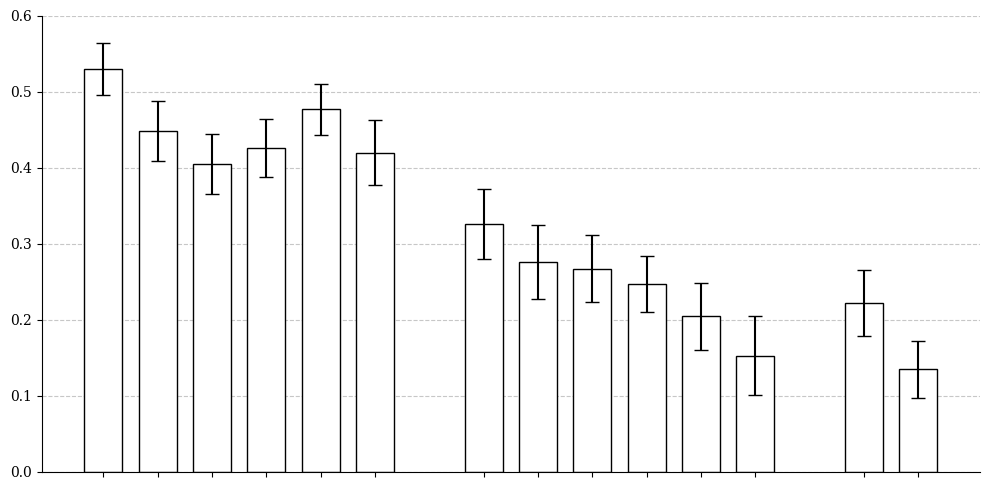

In [16]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif'],
    'mathtext.fontset': 'cm',
})

df_paths = ['ensemble_stab_foldx.csv', 'StaB-ddG.csv', 'appendix/april28_nolinear_rocklin.csv', 'StaB-ddG_zero-shot.csv', 'baselines/foldx_test.csv', 'baselines/rde_filtered.csv', 'baselines/vqmae_filtered.csv', 'baselines/promim.csv', 'baselines/promptddg.csv', 'baselines/diffaffinity.csv', 'baselines/flexddg_protddg.csv', 'baselines/ProteinMPNN_test_novarred.csv', 'baselines/esm_filtered.csv']
method_names = ['StaB-ddG + FoldX', 'StaB-ddG', 'Stability fine-tuned', 'StaB-ddG zero-shot', 'FoldX', 'RDE-Net', 'Surface-VQMAE', 'ProMIM', 'Prompt-DDG', 'DiffAffinity', 'Flex ddG', 'ProteinMPNN', 'ESM-IF1']

groups = {
    'group1': ['StaB-ddG + FoldX', 'StaB-ddG', 'Stability fine-tuned', 'StaB-ddG zero-shot', 'FoldX', 'Flex ddG'],
    'group2': ['RDE-Net', 'Surface-VQMAE', 'ProMIM', 'Prompt-DDG', 'DiffAffinity', 'PPIformer'],
    'group3': ['ESM-IF1', 'ProteinMPNN']
}

group_map = {}
for group_name, members in groups.items():
    for m in members:
        group_map[m] = group_name

fs = 12


# Extract and sort data within groups
grouped_data = []
for group_name, members in groups.items():

    group_members = [(key, results[key]['Per Structure Spearman'], results[key]['Per Structure Spearman Standard Error'])
                     for key in members]
    # Sort within group by Spearman descending
    if group_name != 'group1':
        group_members.sort(key=lambda t: t[1], reverse=True)
    grouped_data.append((group_name, group_members))

# Flatten grouped data for plotting, keep track of group boundaries
x = []
spearmans = []
errors = []
group_boundaries = []  # positions where group changes

pos = []
current_pos = 0

for group_name, members in grouped_data:
    for item in members:
        x.append(item[0])
        spearmans.append(item[1])
        errors.append(item[2])
        pos.append(current_pos)
        current_pos += 1
    group_boundaries.append(current_pos - 0.5)  # halfway between last and next group
    current_pos += 1  # add extra space between groups

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(
    pos,
    spearmans,
    width=0.7,
    yerr=errors,
    capsize=5,
    color='white',
    edgecolor='black'
)

ax.set_xticks(pos)
ax.set_xticklabels([])
# ax.set_xticklabels(x, rotation=45, ha='right', fontsize=fs)

# ax.set_ylabel('Per interface Spearman', fontsize=fs)
ax.set_ylim(0, 0.6)

# Grid and layout
ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()

plt.savefig('skempi_test.png', dpi=300, bbox_inches='tight')
plt.show()